In [4]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [47]:
name='rlcache.strategies.ttl_estimation_strategies.rl_ttl_strategy_'
directory= 'results/rl_ttl_strategy_only_no_episodes/cache_capacity_50000/2019_04_28_10_12'
caching_strategy_dir = f'{directory}/ttl_strategy'

Text(0, 0.5, 'Percentage')

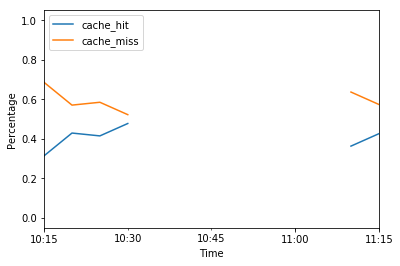

In [50]:
stats_df = pd.read_csv(f'{directory}/rlcache.cache_manager_cache_hit_logger.log', names=['key', 'cache_hit', 'cache_miss'], parse_dates=True)
ax = stats_df.resample('1T').mean().plot()
ax.set_xlabel("Time")
ax.set_ylabel("Percentage")

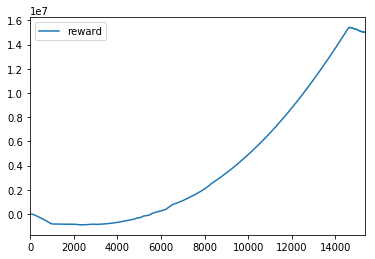

In [51]:
# Useful to compare various RL architecture 
# episode_reward_df = pd.read_csv(f'{eviction_strategy_dir}/{name}reward_logger.log', names=['reward'], parse_dates=True)
# ax = episode_reward_df.resample('5T').sum().plot(title='Sum of reward achieved')
# ax.set_xlabel("Time")
# ax.set_ylabel("Reward")
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.cumsum().plot()


Text(0.5, 0, 'Steps')

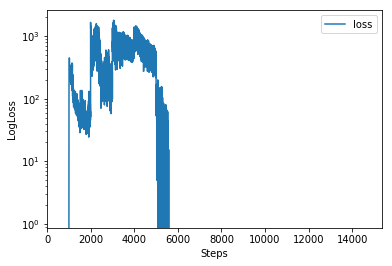

In [52]:

# losses_df = pd.read_csv(f'{eviction_strategy_dir}/{name}loss_logger.log', names=['loss'], parse_dates=True)
# 
# ax = losses_df.resample('5T').sum().plot(logy=True)
# ax.set_ylabel("Loss")
# ax.set_xlabel("Time")

losses_df = pd.read_csv(f'{caching_strategy_dir}/{name}loss_logger.log', names=['timestamp','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")


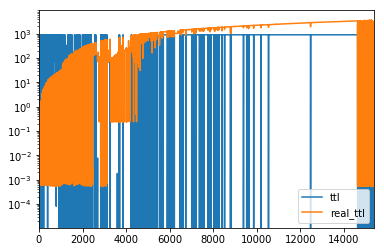

In [54]:
observations_df = pd.read_csv(f'{caching_strategy_dir}/{name}ttl_logger.log', names=['timestamp','observation', 'key', 'ttl', 'real_ttl', 'hits'], usecols=['ttl', 'real_ttl'])
observations_df.plot(logy=True)